# Non-Daily Data (Dữ liệu không phải hằng ngày)

## Sub-daily data (dữ liệu phụ hàng ngày)

Prophet có thể đưa ra dự báo cho chuỗi thời gian với các quan sát phụ hàng ngày bằng cách chuyển vào khung dữ liệu có dấu thời gian trong cột ds. Định dạng của dấu thời gian phải là YYYY-MM-DD HH:MM:SS - xem csv ví dụ [tại đây](https://github.com/facebook/prophet/blob/main/examples/example_yosemite_temps.csv). Khi dữ liệu phụ hàng ngày được sử dụng (theo giờ trong ngày), thời vụ hàng ngày sẽ tự động phù hợp. Ở đây, chúng tôi phù hợp với Tiên tri với dữ liệu có độ phân giải 5 phút (dữ liệu với mỗi 5 phút trong 1 hàng) (nhiệt độ hàng ngày tại Yosemite):

In [1]:
import pandas as pd
from prophet import Prophet

15:55:01 - cmdstanpy - INFO - Chain [1] start processing
15:55:10 - cmdstanpy - INFO - Chain [1] done processing


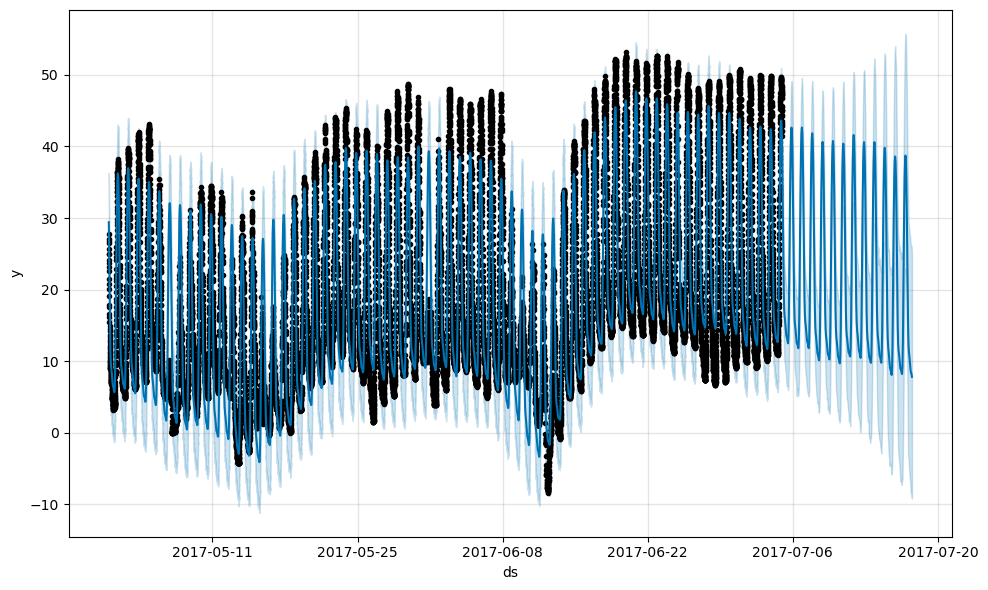

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_yosemite_temps.csv')
m = Prophet(changepoint_prior_scale=0.01).fit(df)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

Thời vụ hàng ngày sẽ hiển thị trong biểu đồ thành phần:

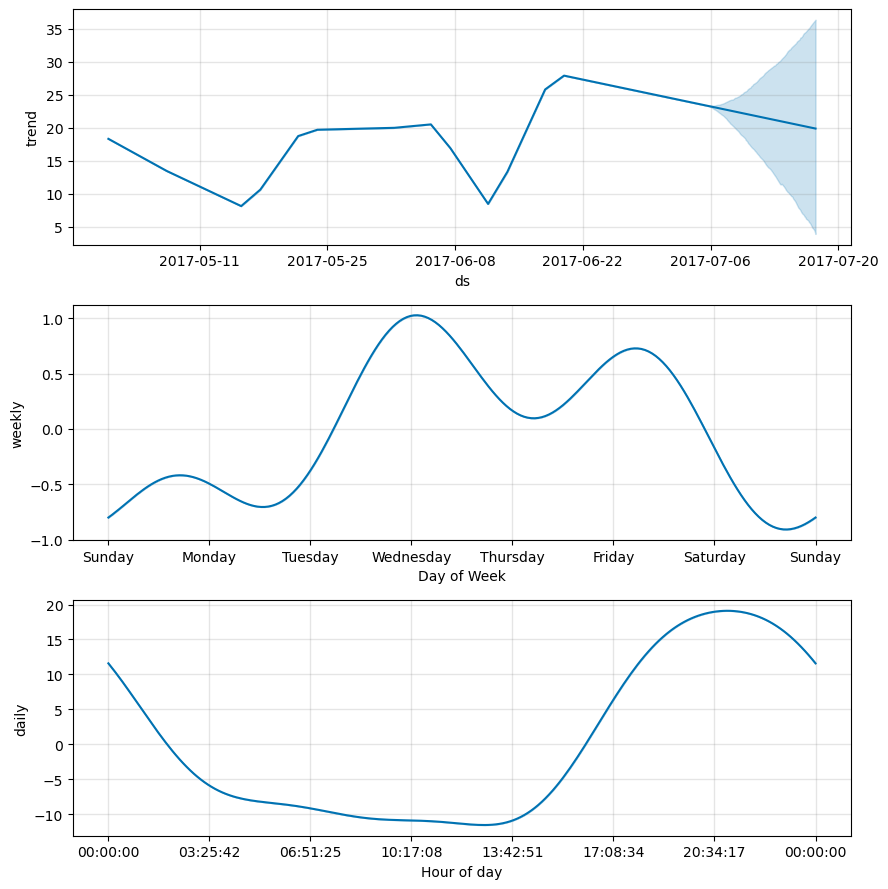

In [3]:
fig=m.plot_components(fcst)

## Data with regular gaps (Dữ liệu có khoảng trống thông thường)

Giả sử tập dữ liệu trên chỉ có các quan sát từ 12a đến 6a:

15:58:26 - cmdstanpy - INFO - Chain [1] start processing
15:58:29 - cmdstanpy - INFO - Chain [1] done processing


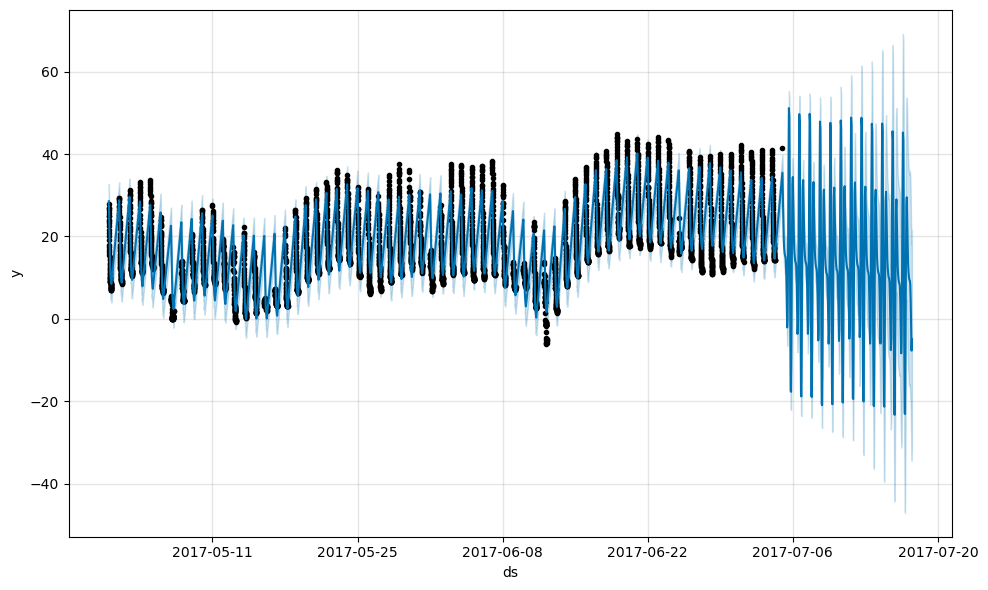

In [4]:
df2 = df.copy()
df2['ds'] = pd.to_datetime(df2['ds'])
df2 = df2[df2['ds'].dt.hour < 6]
m = Prophet().fit(df2)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

Dự báo có vẻ khá kém, với những biến động trong tương lai lớn hơn nhiều so với những gì đã thấy trong lịch sử. Vấn đề ở đây là chúng tôi đã khớp chu kỳ hàng ngày với chuỗi thời gian chỉ có dữ liệu cho một phần trong ngày (12 giờ sáng đến 6 giờ sáng). Do đó, tính thời vụ hàng ngày không bị hạn chế trong thời gian còn lại của ngày và không được ước tính chính xác. Giải pháp là chỉ đưa ra dự đoán cho các khoảng thời gian có dữ liệu lịch sử. Ở đây, điều đó có nghĩa là giới hạn khung dữ liệu trong tương lai có thời gian từ 12a đến 6a:

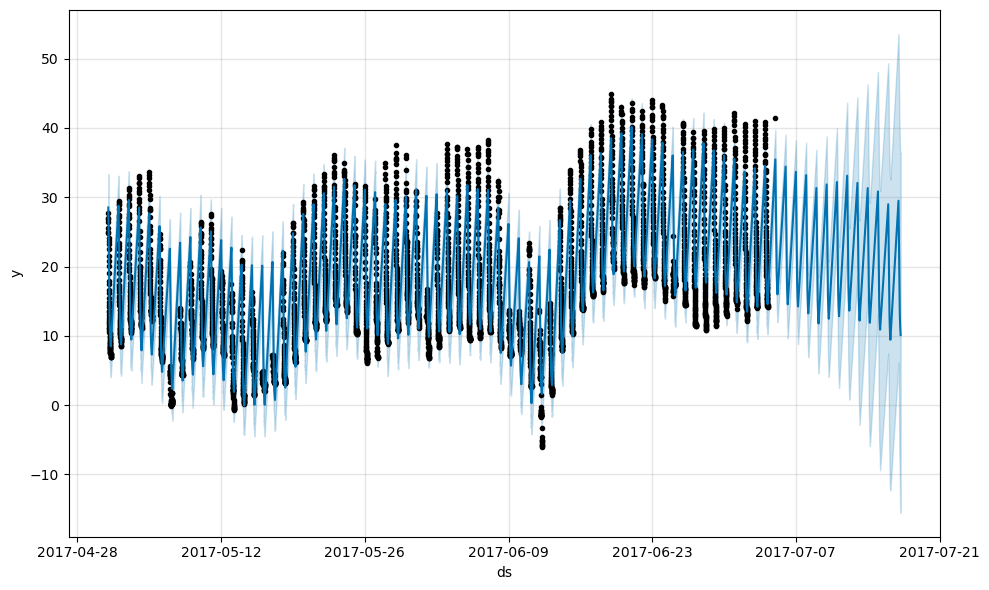

In [5]:
future2 = future.copy()
future2 = future2[future2['ds'].dt.hour < 6]
fcst = m.predict(future2)
fig = m.plot(fcst)

Nguyên tắc tương tự cũng áp dụng cho các bộ dữ liệu khác có khoảng trống thông thường trong dữ liệu. Ví dụ: nếu lịch sử chỉ chứa các ngày trong tuần thì chỉ nên đưa ra dự đoán cho các ngày trong tuần vì tính thời vụ hàng tuần sẽ không được ước tính chính xác cho các ngày cuối tuần.

## Monthly data (Dữ liệu hàng tháng)

Bạn có thể sử dụng Prophet để phù hợp với dữ liệu hàng tháng. Tuy nhiên, mô hình cơ bản là thời gian liên tục, có nghĩa là bạn có thể nhận được kết quả lạ nếu bạn khớp mô hình với dữ liệu hàng tháng và sau đó yêu cầu dự báo hàng ngày. Ở đây chúng tôi dự báo doanh số bán lẻ của Hoa Kỳ trong 10 năm tới:

16:02:35 - cmdstanpy - INFO - Chain [1] start processing
16:02:36 - cmdstanpy - INFO - Chain [1] done processing


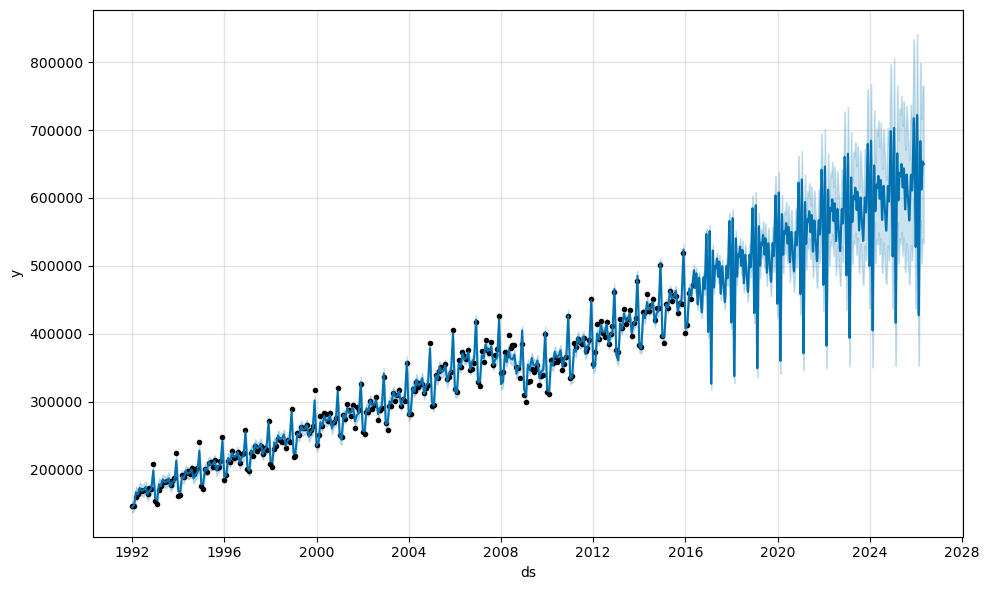

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_retail_sales.csv')
m = Prophet(seasonality_mode='multiplicative').fit(df)
future = m.make_future_dataframe(periods=3652)
fcst = m.predict(future)
fig = m.plot(fcst)

Đây là vấn đề tương tự ở trên khi tập dữ liệu có các khoảng trống thường xuyên. Khi chúng tôi khớp thời vụ hàng năm, nó chỉ có dữ liệu cho ngày đầu tiên của mỗi tháng và các thành phần thời vụ cho những ngày còn lại là không xác định được và quá khớp. Có thể thấy rõ điều này khi làm MCMC để thấy tính không chắc chắn của tính thời vụ:

16:03:36 - cmdstanpy - INFO - CmdStan installation D:\App\anaconda3\envs\py310\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
16:03:36 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
16:03:36 - cmdstanpy - INFO - CmdStan start processing
16:03:36 - cmdstanpy - INFO - Chain [1] start processing
16:03:36 - cmdstanpy - INFO - Chain [2] start processing
16:03:36 - cmdstanpy - INFO - Chain [3] start processing
16:03:36 - cmdstanpy - INFO - Chain [4] start processing
16:03:48 - cmdstanpy - INFO - Chain [4] done processing
16:03:49 - cmdstanpy - INFO - Chain [2] done processing
16:03:49 - cmdstanpy - INFO - Chain [1] done processing
16:03:49 - cmdstanpy - INFO - Chain [3] done processing
16:03:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exce

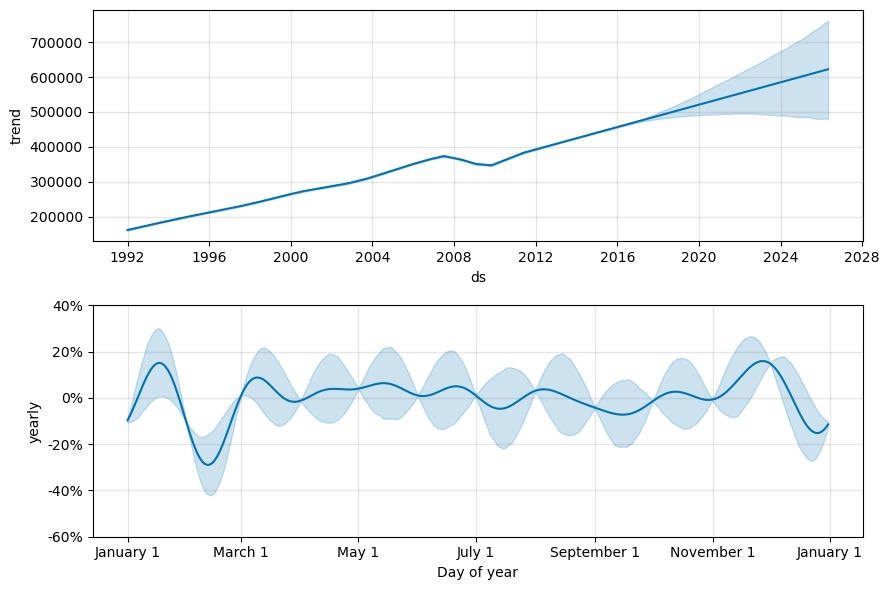

In [7]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(df, show_progress=False)
fcst = m.predict(future)
fig = m.plot_components(fcst)

Tính thời vụ có độ không chắc chắn thấp vào đầu mỗi tháng khi có các điểm dữ liệu, nhưng có phương sai sau rất cao ở giữa. Khi fitting Prophet với dữ liệu hàng tháng, chỉ đưa ra dự báo hàng tháng, có thể thực hiện việc này bằng cách chuyển tần suất vào make_future_dataframe:

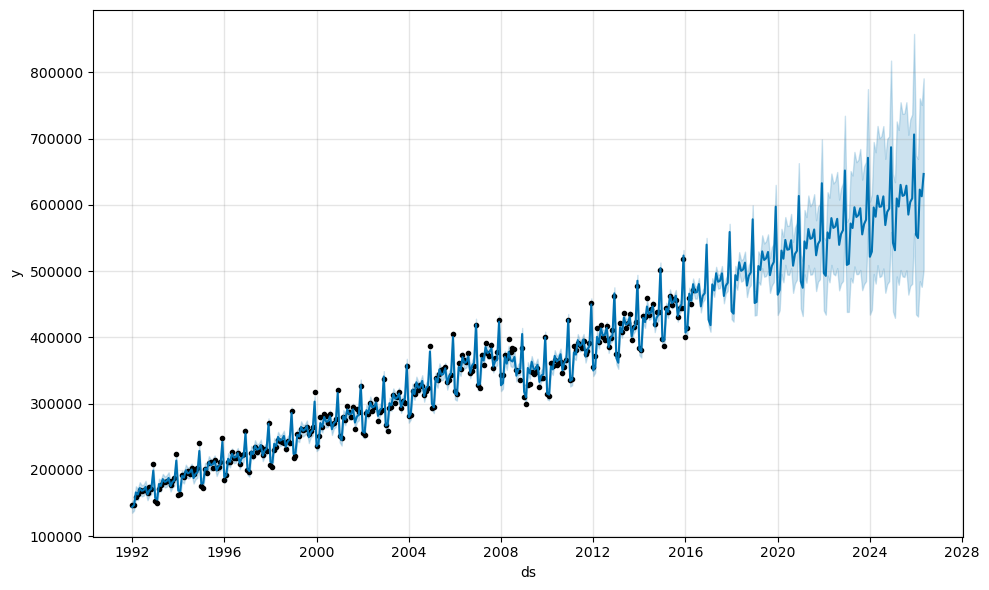

In [8]:
future = m.make_future_dataframe(periods=120, freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)

Trong Python, tần số có thể là bất kỳ thứ gì trong danh sách chuỗi tần số của pandas tại đây: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases . Lưu ý rằng MS được sử dụng ở đây là đầu tháng, nghĩa là điểm dữ liệu được đặt vào đầu mỗi tháng.

Trong dữ liệu hàng tháng, tính thời vụ hàng năm cũng có thể được mô hình hóa với các biến hồi quy bổ sung nhị phân. Cụ thể, mô hình có thể sử dụng thêm 12 biến hồi quy như `is_jan`, `is_feb`, v.v. trong đó `is_jan` là 1 nếu ngày là tháng 1 và 0 nếu ngược lại. Cách tiếp cận này sẽ tránh được khả năng không xác định được trong vòng một tháng đã thấy ở trên. Đảm bảo sử dụng `yearly_seasonality=False `nếu các biến hồi quy bổ sung hàng tháng được thêm vào.

## Holidays with aggregated data (Ngày lễ với dữ liệu tổng hợp)

Hiệu ứng ngày lễ được áp dụng cho ngày cụ thể mà ngày lễ được chỉ định. Với dữ liệu đã được tổng hợp theo tần suất hàng tuần hoặc hàng tháng, các ngày lễ không rơi vào ngày cụ thể được sử dụng trong dữ liệu sẽ bị bỏ qua: ví dụ: ngày lễ thứ Hai trong chuỗi thời gian hàng tuần trong đó mỗi điểm dữ liệu rơi vào Chủ nhật. Để bao gồm các hiệu ứng kỳ nghỉ trong mô hình, ngày nghỉ sẽ cần được di chuyển đến ngày trong khung dữ liệu lịch sử mà hiệu ứng mong muốn. Lưu ý rằng với dữ liệu tổng hợp hàng tuần hoặc hàng tháng, nhiều hiệu ứng kỳ nghỉ sẽ được nắm bắt tốt theo mùa hàng năm, do đó, các ngày lễ bổ sung có thể chỉ cần thiết cho những ngày lễ diễn ra trong các tuần khác nhau trong suốt chuỗi thời gian.